In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statistics
from scipy import stats

import os
import os.path
import xlrd
import xlsxwriter

In [19]:
# Please run these files before running any codes

df_gr = pd.read_excel("Exam Stress Final.xlsx", "Grades")
df_demo = pd.read_excel("Exam Stress Final.xlsx", "Demography")
df_eda = pd.read_excel("Exam Stress Final.xlsx", "EDA")
df_hr = pd.read_excel("Exam Stress Final.xlsx", "HR")
df_temp = pd.read_excel("Exam Stress Final.xlsx", "Temp")
df_ibi = pd.read_excel("Exam Stress Final.xlsx", "IBI")
df_ibi.head(4)

Time in mins    IBI Student_id   Exam
0             0  0.446        S01  final
1             1  0.473        S01  final
2             3  0.444        S01  final
3             4  0.496        S01  final

In [20]:
# Please run these files before running any codes

#changing all Exam to lower case (espescially to midterms)and changing student id S010 to S10 for future reference- 

df_EDA = df_eda
df_EDA['Exam'] = df_eda['Exam'].str.lower()
df_EDA.loc[df_EDA['Student_id'] == 'S010', 'Student_id'] = 'S10'

df_HR = df_hr
df_HR['Exam'] = df_hr['Exam'].str.lower()
df_HR.loc[df_hr['Student_id'] == 'S010', 'Student_id'] = 'S10'

df_TEMP = df_temp
df_TEMP['Exam'] = df_temp['Exam'].str.lower()
df_TEMP.loc[df_temp['Student_id'] == 'S010', 'Student_id'] = 'S10'

df_IBI = df_ibi
df_IBI['Exam'] = df_ibi['Exam'].str.lower()
df_IBI.loc[df_IBI['Student_id'] == 'S010', 'Student_id'] = 'S10'
df_IBI.tail(3)

df_DEMO = df_demo

df_GR = df_gr

df_HR.tail(5)

HR  Time in mins Student_id       Exam
7369  171.387         214.0        S10  midterm 2
7370  121.597         215.0        S10  midterm 2
7371  109.165         216.0        S10  midterm 2
7372      NaN           NaN        NaN  midterm 2
7373      NaN           NaN        NaN  midterm 2

#HR sheet- data cleaning- There are two rows of missing values or null values so need to remove those rows

In [6]:
#df2.isna() # false, means no na values. Lets check for empty-
df_HR.isnull().sum()

HR              2
Time in mins    2
Student_id      2
Exam            0
dtype: int64

In [7]:
#replace missing values of HR, Time and Student_id as 'N/NA' and then drop those two rows
df_HR.fillna({"HR":'N/NA', "Time in mins": 'N/NA', "Student_id": 'N/NA'}, inplace = True)
df_HR = df_HR.drop(df_HR[df_HR['Student_id'] == 'N/NA'].index)
df_HR.tail(10)

HR Time in mins Student_id       Exam
7362   122.55        207.0        S10  midterm 2
7363  114.737        208.0        S10  midterm 2
7364  108.701        209.0        S10  midterm 2
7365  144.923        210.0        S10  midterm 2
7366   175.02        211.0        S10  midterm 2
7367  141.667        212.0        S10  midterm 2
7368  162.584        213.0        S10  midterm 2
7369  171.387        214.0        S10  midterm 2
7370  121.597        215.0        S10  midterm 2
7371  109.165        216.0        S10  midterm 2

In [8]:
#check for na & null values for EDA, Temp, IBI sheets as well - False means no na value
df_EDA.isna() 
df_EDA.isnull().sum()

EDA             0
Time in mins    0
Student_id      0
Exam            0
dtype: int64

In [9]:
df_TEMP.isna() 
df_TEMP.isnull().sum()

TEMP            0
Time in mins    0
Student_id      0
Exam            0
dtype: int64

In [10]:
df_IBI.isna() 
df_IBI.isnull().sum()

Time in mins    0
IBI             0
Student_id      0
Exam            0
dtype: int64

In [11]:
df_IBI.tail(5)

Time in mins    IBI Student_id       Exam
3310           159  0.463        S10  midterm 2
3311           160  0.391        S10  midterm 2
3312           170  0.393        S10  midterm 2
3313           171  0.566        S10  midterm 2
3314           172  0.402        S10  midterm 2

# Q1 - Q80 solutions:

In [14]:
# Q1. Using the mean interbeat interval per minute, calculate the Root Mean Square of successive differences for any 30 minute interval and add this to IBI

df=df_IBI
duration=((df['Time in mins']>=31)&(df['Time in mins']<=60))
df1=df.loc[duration]
def calculate_rmssd(ibi_values):
    sd=np.diff(ibi_values)
    sd_squared=sd**2
    mean_squared_diff=np.mean(sd_squared)
    rmssd=np.sqrt(mean_squared_diff)
    return rmssd
def calculate_ibi_with_rmssd(mean_df,rmssd):
    ibi_with_rmssd=mean_df+rmssd
    return ibi_with_rmssd
rmssd_value=calculate_rmssd(df1['IBI'])
df1['IBI_rmssd']=calculate_ibi_with_rmssd((df1['IBI']),rmssd_value)
print(f"Mean IBI per minute:{np.mean(df1['IBI']):.2f}")
print(f"RMSSD:{rmssd_value:.2f}")
print(df1)

Mean IBI per minute:0.60
RMSSD:0.14
      Time in mins    IBI Student_id       Exam  IBI_rmssd
10              31  0.511        S01      final   0.647161
11              32  0.502        S01      final   0.638161
12              33  0.509        S01      final   0.645161
13              34  0.508        S01      final   0.644161
14              35  0.493        S01      final   0.629161
...            ...    ...        ...        ...        ...
3227            54  0.695        S10  midterm 2   0.831161
3228            55  0.680        S10  midterm 2   0.816161
3229            56  0.683        S10  midterm 2   0.819161
3230            58  0.750        S10  midterm 2   0.886161
3231            60  0.604        S10  midterm 2   0.740161

[557 rows x 5 columns]


C:\Users\Tech World INC\AppData\Local\Temp\ipykernel_28660\535879699.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['IBI_rmssd']=calculate_ibi_with_rmssd((df1['IBI']),rmssd_value)


In [15]:
# Q2. Group the rows in the file EDA into 3 parts based on time: First, Second, Third part of each exam

df=df_EDA
def timepart(time, maxtime):
    interval = maxtime / 3
    if 0 <= time < interval:
        return 'Firstpart'
    elif interval <= time < 2 * interval:
        return 'Secondpart'
    else:
        return 'Thirdpart'    
maxtimes = df.groupby('Exam')['Time in mins'].max()
df['Time Category'] = df.apply(lambda row: timepart(row['Time in mins'], maxtimes[row['Exam']]), axis=1)
print(df[['Time in mins', 'Exam', 'Time Category']])

      Time in mins       Exam Time Category
0                1      final     Firstpart
1                2      final     Firstpart
2                3      final     Firstpart
3                4      final     Firstpart
4                5      final     Firstpart
...            ...        ...           ...
7369           212  midterm 2     Thirdpart
7370           213  midterm 2     Thirdpart
7371           214  midterm 2     Thirdpart
7372           215  midterm 2     Thirdpart
7373           216  midterm 2     Thirdpart

[7374 rows x 3 columns]


In [16]:
# Q3. Based on the calculation in question 2, which part of the exam did students suffer maximum stress?
#You may assume that higher recorded skin conductance co-incides with high levels of stress

grouped_data = df.groupby("Time Category")
avg_eda = grouped_data["EDA"].mean()
max_eda = avg_eda.max()
max_stress = avg_eda[avg_eda == max_eda].index[0]
print("The exam part when the student suffered maximum stress:",max_stress)

The exam part when the student suffered maximum stress: Secondpart


In [24]:
# Q4. Using Root Mean Square of Successive differences calculated in Q1, calculate and store HRV per exam for every student. 

import math
df=df_IBI
def calculate_rmssd(IBI):
    sd=np.diff(IBI)
    sd_squared=sd**2
    mean_squared_diff=np.mean(sd_squared)
    rmssd=np.sqrt(mean_squared_diff)
    return rmssd
hrv_per_exam=df.groupby(['Student_id','Exam'])['IBI'].apply(calculate_rmssd).reset_index(name='HRV')
hrv_per_exam['HRV']*=600
hrv_per_exam['HRV']=hrv_per_exam['HRV'].astype(int)
print(hrv_per_exam)
filepath1 = "Exam Stress Final.xlsx"     
with pd.ExcelWriter(filepath1,engine='openpyxl',mode='a',if_sheet_exists='replace')as writer:
    hrv_per_exam.to_excel(writer,sheet_name='HRV2',index=False)
    print(f"Data has been written'{filepath1}' in the 'HRV2'sheet.")

   Student_id       Exam  HRV
0         S01      final   63
1         S01  midterm 1   88
2         S01  midterm 2   63
3         S02      final   27
4         S02  midterm 1  125
5         S02  midterm 2   85
6         S03      final   58
7         S03  midterm 1  133
8         S03  midterm 2   47
9         S04      final   81
10        S04  midterm 1   92
11        S04  midterm 2  116
12        S05      final   70
13        S05  midterm 1  149
14        S05  midterm 2   23
15        S06      final   50
16        S06  midterm 1  143
17        S06  midterm 2   89
18        S07      final   81
19        S07  midterm 1  132
20        S07  midterm 2   91
21        S08      final  105
22        S08  midterm 1   68
23        S08  midterm 2   94
24        S09      final   51
25        S09  midterm 1  120
26        S09  midterm 2   50
27        S10      final   44
28        S10  midterm 1  117
29        S10  midterm 2   44
Data has been written'Exam Stress Final.xlsx' in the 'HRV2'sheet.


In [12]:
# Q5. Join all tables to produce one file that contains all student 1's readings for IBI, EDA , HR and temp

df1=df_IBI
df2= df_HR
df3= df_EDA
df4 = df_temp

df5=pd.DataFrame()
merge_df1= pd.merge(df1,df2,on=['Time in mins','Student_id','Exam'],how='outer')
merge_df2= pd.merge(merge_df1,df3,on=['Time in mins','Student_id','Exam'],how='outer')
merge_df3= pd.merge(merge_df2,df4,on=['Time in mins','Student_id','Exam'],how='outer')
merge_df3

Time in mins    IBI Student_id       Exam       HR    EDA    TEMP
0               0  0.446        S01      final      NaN    NaN     NaN
1               1  0.473        S01      final  119.023  0.040  22.080
2               3  0.444        S01      final  131.586  0.024  22.022
3               4  0.496        S01      final  109.852  0.024  22.339
4               8  0.448        S01      final  102.488  0.024  19.247
...           ...    ...        ...        ...      ...    ...     ...
7400        214.0    NaN        S10  midterm 2  171.387  0.021  22.344
7401        215.0    NaN        S10  midterm 2  121.597  0.021  22.342
7402        216.0    NaN        S10  midterm 2  109.165  0.021  22.346
7403          200    NaN        S05  midterm 1      NaN  0.000  24.200
7404          166    NaN        S08  midterm 2      NaN  0.002  23.477

[7405 rows x 7 columns]

In [13]:
# Q6. Calulate the age and Display Age and drop the Date of Birth with  iteratively.  (Replace DOB for other questions when complete)

import pandas as pd
import datetime as DT
df_DEMO = df_demo

df = df_DEMO
now = DT.datetime.now()
df["Age"] = ((now - df["DOB"]).dt.days)//365
print(df)
df_new= df.copy()
df_new
df_new.pop('DOB')
df_new


  Student_id        DOB First Name  Last Name Gender     Race  Age
0        S01 2009-01-01    Barbara    Walters      F    White   14
1        S02 2009-02-02       Nora      Jones      F    White   14
2        S03 2009-07-12    Gabriel    Willows      F    Asian   14
3        S04 2009-09-09       John        Doe      M    Asian   14
4        S05 2009-05-06       Jane        Doe      F  African   14
5        S06 2008-04-04        Pat     Murray      M  African   15
6        S07 2010-08-01      Roger  Frederick      M  African   13
7        S08 2009-03-03       John      Wills      M    White   14
8        S09 2009-10-23       Paul    Cartney      M    White   14
9        S10 2009-11-14     Janice      Smith      F  Spanish   14


Student_id First Name  Last Name Gender     Race  Age
0        S01    Barbara    Walters      F    White   14
1        S02       Nora      Jones      F    White   14
2        S03    Gabriel    Willows      F    Asian   14
3        S04       John        Doe      M    Asian   14
4        S05       Jane        Doe      F  African   14
5        S06        Pat     Murray      M  African   15
6        S07      Roger  Frederick      M  African   13
7        S08       John      Wills      M    White   14
8        S09       Paul    Cartney      M    White   14
9        S10     Janice      Smith      F  Spanish   14

In [27]:
# Q7. Using numpy functions, transpose and multiply the following arrays
#a=np.arange(4).reshape(2,2)
#b=np.arange(6).reshape(3,2) 

a=np.arange(4).reshape(2,2)
b=np.arange(6).reshape(3,2) 
print(a.transpose())
print(b.transpose())
a=np.arange(4).reshape(2,2)
b=np.arange(6).reshape(3,2) 
#a_new=a.flatten()
#a_new
#b
#mul = b*np.transpose(np.array([a_new,]*1)
b*np.expand_dims(a,1)

[[0 2]
 [1 3]]
[[0 2 4]
 [1 3 5]]


array([[[ 0,  1],
        [ 0,  3],
        [ 0,  5]],

       [[ 0,  3],
        [ 4,  9],
        [ 8, 15]]])

In [28]:
# Q8. Write a Python program to create an array of 5 integers and display the array items in reverse order
import numpy as np
arr=np.array([1,2,3,4,5])
arr
arr1=list(reversed(arr))
print('Reversed Array is : ', arr1)

Reversed Array is :  [5, 4, 3, 2, 1]


In [29]:
# Q9. What was the average grade for all students in the final exam vs both midterms
import openpyxl
import pprint
#wb=openpyxl.load_workbook("Exam Stress Final.xlsx")

df_GR= df_gr
file = df_GR
#sheet= wb.get_sheet_by_name('Grades')
print('The average grade for all students in the final exam is :' , file['final'].mean())
print('The average grade for all students in the Midterm 1 is :',file['Midterm 1'].mean())
print('The average grade for all students in the Midterm 2 is :',file['Midterm 2'].mean())

The average grade for all students in the final exam is : 156.7
The average grade for all students in the Midterm 1 is : 77.5
The average grade for all students in the Midterm 2 is : 69.9


In [30]:
# Q10. Which students basal body temperature was highest during the second part of the exam?

df_temp = df_TEMP
maxtime_per_student_exam = df_temp.groupby(['Student_id', 'Exam'])['Time in mins'].max()
df_temp['Half Time'] = df_temp.apply(lambda row: maxtime_per_student_exam[(row['Student_id'], row['Exam'])] / 2, axis=1)
secondhalf_temp_df = df_temp[df_temp['Time in mins'] > df_temp['Half Time']]
maxtemp_second_half = secondhalf_temp_df.groupby(['Student_id'])['TEMP'].max()
max_temp_student = maxtemp_second_half.idxmax()
highest_temperature = maxtemp_second_half.max()
print(max_temp_student,'Has highest basal body temperature during second part of the exam i.e ' ,highest_temperature) 

#file.set_index('Student_id',inplace=True)
#result=file.loc['921']
#result


S02 Has highest basal body temperature during second part of the exam i.e  35.035


In [32]:
# Q11. What are the top 3 grades in the final exam? What % of the top 3 grades belonged to males vs females? 
df = df_GR 
df1= df_DEMO
df2= pd.merge(df,df1,on='Student_id')
df2 = df2.sort_values(by='final', ascending=False)
df3=df2.head(3)
print(df3)
gender_count=df3['Gender'].value_counts()
gender_count
gender_percentage=gender_count/gender_count.sum()*100
gender_percentage

  Student_id  Midterm 1  Midterm 2  final        DOB First Name Last Name  \
2        S03         77         90    188 2009-07-12    Gabriel   Willows   
7        S08         92         88    184 2009-03-03       John     Wills   
0        S01         78         82    182 2009-01-01    Barbara   Walters   

  Gender   Race  Age  
2      F  Asian   14  
7      M  White   14  
0      F  White   14  


Gender
F    66.666667
M    33.333333
Name: count, dtype: float64

In [33]:
# Q12. phonebook={"john":938477566,"Jack":938377264,"Jill":947662781}  ,find the phone number of Joe.

phonebook={"john":938477566,"Jack":938377264,"Jill":947662781}
joe_phonenumber=phonebook.get("Joe")
if joe_phonenumber is not None:
    print("Joe's Phonenumber:",joe_phonenumber)
else:
    print("Joe's phonenumber not found")

Joe's phonenumber not found


In [34]:
# Q13. How many minutes did the midterm 2 last( on average) for all 10 students
df=df_IBI
midterm2 = df[df['Exam'] == 'midterm 2']
maxtime_per_student = midterm2.groupby('Student_id')['Time in mins'].max()
avg_midterm2 = maxtime_per_student.mean()
avg_midterm2
print('For all 10 students Midterm 2 lasts', avg_midterm2,'minutes on average ' )

For all 10 students Midterm 2 lasts 176.1 minutes on average 


C:\Users\Tech World INC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 3500x2000 with 0 Axes>

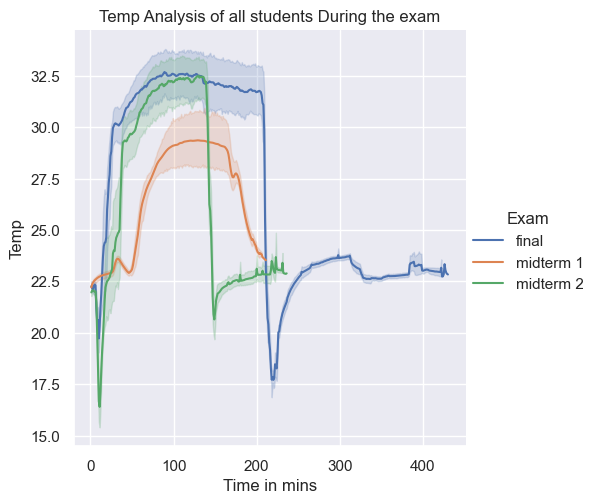

Analysis: 
       1. During Midterm 1: for all students, at the start of exam, body temp was around avg. temp was 22.5
          and it gradually increased till around 28-30 during the 1st part of exam. 
          Then at the end of exam it was lowered to 22.5.
       2. During Midterm 2: for all students, at the start of exam, body temp was around avg. temp was 22.5. However,
          it dropped and there possibility of error in sampling or possibility of outliers that affected the trend 
          at the start of exam. It gradually increased till around 32-33 during the 1st part of exam. 
          However, it again suddenly dropped to normal temp of 22.5. It could mean that
       3. During Final: Same as Midterm 2,body temp was low at the start of exam, then gradually increased till 32-33 
          during 1st part of exam and contineud to be in range of 30-33 during 2nd part of exam.
          Then in 3rd part of exam, it dropped and contineud to be in the range of 22-25.
       

In [35]:
# Q14. Analyze the trend of body temp at the start of the exam. 
#Were body temperatures higher or lower in the first part of the exam. What is the overall trend?

import seaborn as sns

Temp_per_minute = df_TEMP.sort_values("Student_id")

sns.set_theme(style="darkgrid")

plt.figure(figsize=(35,20))


sns.relplot(data= Temp_per_minute , x="Time in mins", y="TEMP",kind="line", hue="Exam")

plt.xlabel('Time in mins')
plt.ylabel('Temp')

#plt.xlim([0, 400])
#plt.ylim([0, 38])
plt.title('Temp Analysis of all students During the exam')

plt.show()

print(
    """Analysis: 
       1. During Midterm 1: for all students, at the start of exam, body temp was around avg. temp was 22.5
          and it gradually increased till around 28-30 during the 1st part of exam. 
          Then at the end of exam it was lowered to 22.5.
       2. During Midterm 2: for all students, at the start of exam, body temp was around avg. temp was 22.5. However,
          it dropped and there possibility of error in sampling or possibility of outliers that affected the trend 
          at the start of exam. It gradually increased till around 32-33 during the 1st part of exam. 
          However, it again suddenly dropped to normal temp of 22.5. It could mean that
       3. During Final: Same as Midterm 2,body temp was low at the start of exam, then gradually increased till 32-33 
          during 1st part of exam and contineud to be in range of 30-33 during 2nd part of exam.
          Then in 3rd part of exam, it dropped and contineud to be in the range of 22-25.
       4. Overall, During all exams, for all students, we can say that at the start of exams, body temperature was
          low then it gradualy increased during 1st part of exams and dropped in 2nd part of exams and contineud to be
          in normal range during third part of exam."""    
)

In [36]:
# Q15. What % of all students had a HR>80 and an HRV<30 in the second part of the finals?

# final exam condition
final_condition1 = (df_IBI['Time in mins']<=120.0) &(df_IBI['Exam']=='final')
final_condition2 = ((df_IBI['Time in mins']>=121.0) & (df_IBI['Time in mins']<=240)) &(df_EDA['Exam']=='final')
final_condition3 = (df_IBI['Time in mins']>=241) &(df_IBI['Exam']=='final')

# midterm 1 and midterm 2 condition
mid_cond1=(df_IBI['Time in mins']<=60)&(df_IBI['Exam']!='final')
mid_cond2=((df_IBI['Time in mins']>=61)& (df_IBI['Time in mins']<=120))& (df_IBI['Exam']!=('final' ))
mid_cond3=(df_IBI['Time in mins']>=121)&(df_IBI['Exam']!=('final' ))

df1=df_IBI
df1.loc[final_condition1,'Part']='Part 1'
df1.loc[final_condition2,'Part']='Part 2'
df1.loc[final_condition3,'Part']='Part 3'    

df1.loc[mid_cond1,'Part']='Part 1'
df1.loc[mid_cond2,'Part']='Part 2'
df1.loc[mid_cond3,'Part']='Part 3'
import math
def calculate_RMSSD(IBI):
    differences = np.diff(IBI)
    squared_diff = differences ** 2
    mean_squared_diff = np.mean(squared_diff)
    rmssd = np.sqrt(mean_squared_diff)
    return rmssd
# Calculate RMSSD (HRV) per exam for each student
hrv_per_exam =df1.groupby(['Student_id', 'Exam','Part'])['IBI'].apply(calculate_RMSSD).reset_index(name='HRV')
# Display HRV per exam for every student
# muliptly HRV by 600 to get ms
hrv_per_exam['HRV'] *= 600
hrv_per_exam['HRV']=hrv_per_exam['HRV'].astype(int)

final_condition1 = (df_HR['Time in mins']<=120.0) &(df_HR['Exam']=='final')
final_condition2 = ((df_HR['Time in mins']>=121.0) & (df_HR['Time in mins']<=240)) &(df_EDA['Exam']=='final')
final_condition3 = (df_HR['Time in mins']>=241) &(df_HR['Exam']=='final')

#creating condition for midterm 1 and midterm 2
mid_cond1=(df_HR['Time in mins']<=60)&(df_HR['Exam']!='final')
mid_cond2=((df_HR['Time in mins']>=61)& (df_HR['Time in mins']<=120))& (df_HR['Exam']!=('final' ))
mid_cond3=(df_HR['Time in mins']>=121)&(df_HR['Exam']!=('final' ))

df3=df_HR

#assigning Parts for different time parts 
df3.loc[final_condition1,'Part']='Part 1'
df3.loc[final_condition2,'Part']='Part 2'
df3.loc[final_condition3,'Part']='Part 3'    

df3.loc[mid_cond1,'Part']='Part 1'
df3.loc[mid_cond2,'Part']='Part 2'
df3.loc[mid_cond3,'Part']='Part 3'

    
#filtering Students with hr>80 and hrv<30    
hr_st=df3[(df3['HR']>80) & (df3['Part']=='Part 2')]['Student_id'].unique()
hrv_st=hrv_per_exam[(hrv_per_exam['HRV']<30)&(hrv_per_exam['Part']=='Part 2')]['Student_id'].unique()
print("Student_id with HRV<30 in second part : ",hrv_st)
print("Student_id with HR>80 in second Part: " ,hr_st)
#finding the common students with hr>80 and hrv<30
common_student=np.intersect1d(hr_st,hrv_st)
common_student_count=len(common_student)
common_student_count
total_students=len(df3['Student_id'].unique())
t=(common_student_count/total_students)*100
print('% of Student with HR>80 and HRV<30 in second Part:' ,t,"%")

Student_id with HRV<30 in second part :  ['S05']
Student_id with HR>80 in second Part:  ['S01' 'S02' 'S03' 'S04' 'S05' 'S06' 'S07' 'S08' 'S09' 'S10']
% of Student with HR>80 and HRV<30 in second Part: 10.0 %


In [37]:
# Q16. What was the % difference between scores in both mid-terms vs the final
df = df_GR
df['Addition'] = df['Midterm 1']+ df['Midterm 2']
df['% in midterms']=df['Addition']*100/200
df['% in finals']=df['final']*100/200
df

Student_id  Midterm 1  Midterm 2  final  Addition  % in midterms  \
0        S01         78         82    182       160           80.0   
1        S02         82         85    180       167           83.5   
2        S03         77         90    188       167           83.5   
3        S04         75         77    149       152           76.0   
4        S05         67         77    157       144           72.0   
5        S06         71         64    175       135           67.5   
6        S07         64         33    110        97           48.5   
7        S08         92         88    184       180           90.0   
8        S09         80         39    126       119           59.5   
9        S10         89         64    116       153           76.5   

   % in finals  
0         91.0  
1         90.0  
2         94.0  
3         74.5  
4         78.5  
5         87.5  
6         55.0  
7         92.0  
8         63.0  
9         58.0

In [38]:
# Q17. What % of all students are Asian?
dict_df = df_DEMO
total_students = set()
for i in dict_df['Student_id']:
    total_students.add(i)
count_total_students=len(total_students) 
#print('count_total_students:', count_total_students)

asian_count = 0
for i in dict_df['Race']:
    if (i == 'Asian'):
        asian_count = asian_count+1
#print(asian_count)

asian_students_percentage = (asian_count/count_total_students)*100
print('Asian students percentage is:', asian_students_percentage, '%')

Asian students percentage is: 20.0 %


In [39]:
# Q18. Display the full name of all students born in 2010
#print(dict_df['DOB'])

dict_df['Year'] = dict_df['DOB'].dt.year
for i in dict_df['Year'].index:
    if dict_df['Year'][i] == 2010:
        i
full_name =  [dict_df['First Name'][i] +" "+ dict_df['Last Name'][i]]
print("Full name of all students born in 2010 is:", full_name)

Full name of all students born in 2010 is: ['Janice Smith']


In [40]:
# Q19. What was the average HR of the students who achieved the top 3 grades in mid-term 2
df_HR
df_Grades = df_GR

# Create a dictionary to map student ID to grade
student_grade_map = {}
for index, row in df_Grades.iterrows():
    student_id = row['Student_id']
    grade = row['Midterm 2']
    student_grade_map[student_id] = grade

# Filter for top 3 grades
top_3_student_ids = []
for grade in sorted(student_grade_map.values(), reverse=True)[:3]:
    for student_id, student_grade in student_grade_map.items():
        if student_grade == grade:
            top_3_student_ids.append(student_id)
            break

# Filter HR data
filtered_hr_df = df_HR[df_HR['Student_id'].isin(top_3_student_ids)]

# Calculate average HR
avg_hr = filtered_hr_df["HR"].mean()

print(f"The average HR of the students who achieved the top 3 grades in Midterm 2: {avg_hr:.2f}")

The average HR of the students who achieved the top 3 grades in Midterm 2: 107.99


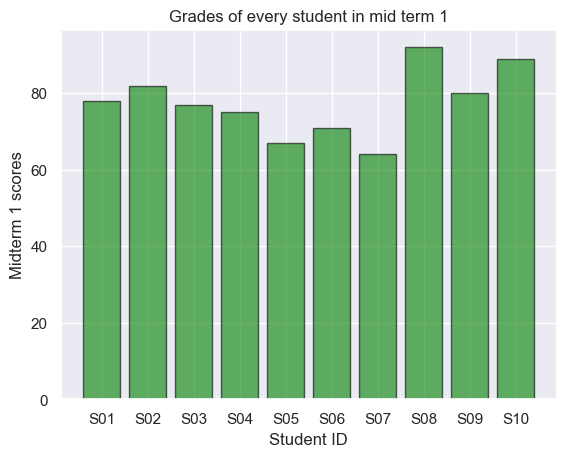

In [42]:
# Q20. Use a bar chart to display the grades of every student in mid term 1

df_Grades = df_GR

plt.bar(df_Grades['Student_id'], df_Grades['Midterm 1'], color ='Green', width = 0.8, 
        alpha = 0.6, edgecolor='black')
plt.xlabel("Student ID")
plt.ylabel("Midterm 1 scores")
plt.title("Grades of every student in mid term 1")
plt.show()

In [43]:
# Q21. What % of all students are female?

df_Demography = df_DEMO
F_count = 0
T_count = 0
for i in df_Demography['Gender']:
    if i == 'F':
        F_count = F_count+1
for j in df_Demography['Gender']:
    T_count = T_count +1
F_Percent = (F_count/T_count)*100
print("Percentage of female students is", F_Percent,"%")

Percentage of female students is 50.0 %


In [44]:
# Q22. Show the students for whom temperature fell below basal body temp of 36 degrees

df_Temp = df_TEMP
below_basal=set()
for i in df_Temp['TEMP'].index:
    if df_Temp['TEMP'][i] < 36:
        below_basal.add( (df_Temp['Student_id'].loc[i]))
print("Students for whom temperature fell below basal body temp of 36 degrees:\n", below_basal)

Students for whom temperature fell below basal body temp of 36 degrees:
 {'S05', 'S09', 'S07', 'S10', 'S04', 'S02', 'S01', 'S06', 'S03', 'S08'}


In [45]:
# Q23. Connect to sql and query the data in temp into a table of the same name

df_temp = df_TEMP
df_temp.to_csv('temp_data.csv')

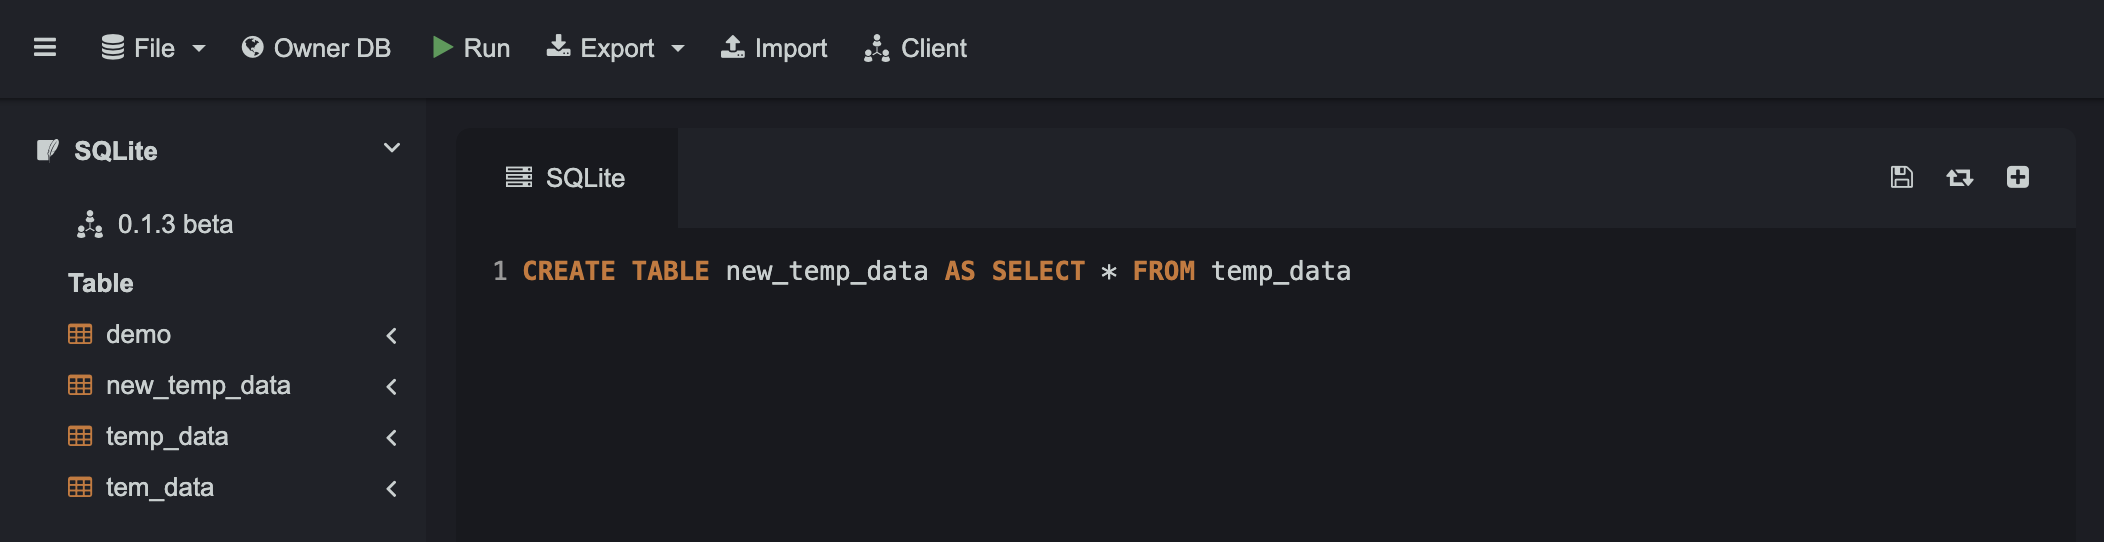

In [46]:
#24.Display a sunburst chart of count of students by Age, Gender and Race.

import plotly.express as px
df_Demography = df_DEMO

df_Demography["Age"] = (pd.to_datetime('today') - df_Demography["DOB"]).dt.days // 365

data = dict(Gender = df_Demography['Gender'].tolist(),
           Race = df_Demography['Race'].tolist(),
           Age = df_Demography['Age'].tolist())
#print(type(data))
#print(data)
fig1 = px.sunburst(data, path=['Race', 'Gender','Age'])
fig1.show()

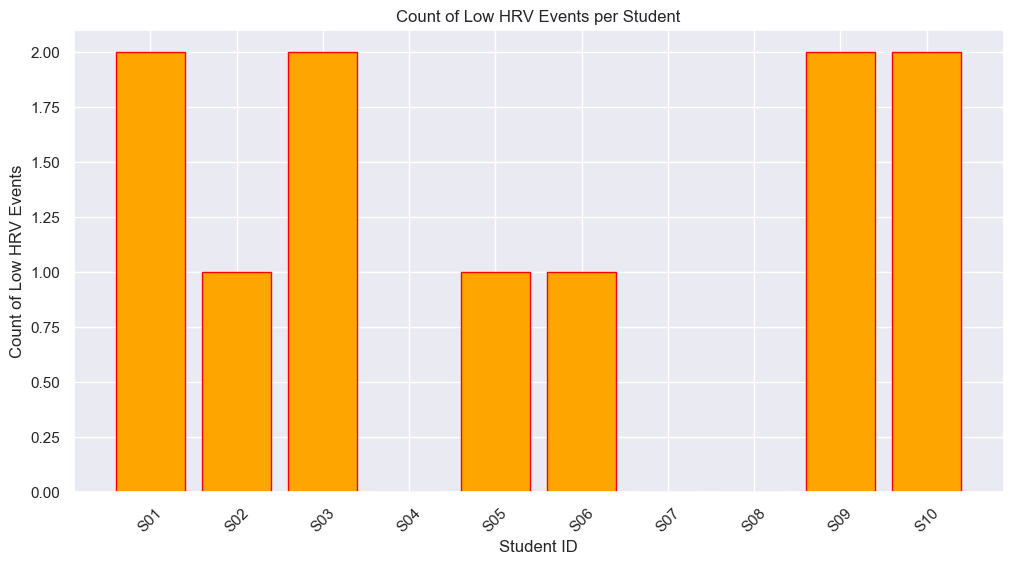

In [47]:
# Q25. Create a visualization on the count of Students with an HRV 10 or more points lower than ideal HRV.

df = df_IBI

# Function to calculate the RMSSD from the IBI data
def calculate_rmssd(IBI):
    sd_squared = np.diff(IBI)**2
    mean_squared_diff = np.mean(sd_squared)
    rmssd = math.sqrt(mean_squared_diff)
    rmssd *= 600
    return rmssd

hrv_per_exam = df.groupby(["Student_id", "Exam"])["IBI"].apply(calculate_rmssd).reset_index(name="HRV")

# Ideal HRV, Usually for this age we take as 75
hrv_per_exam["Ideal HRV"] = 75
# Unique students
unique_students = hrv_per_exam['Student_id'].unique()

# students count with HRV 10 or more points lower than ideal HRV for each student
low_hrv_count_per_student = []
for student_id in unique_students:
    student_data = hrv_per_exam[hrv_per_exam['Student_id'] == student_id]
    low_hrv_count_per_student.append(len(student_data[(student_data["HRV"] + 10) < student_data["Ideal HRV"]]))

plt.figure(figsize=(12, 6))
plt.bar(unique_students, low_hrv_count_per_student,color='orange',edgecolor='red')
plt.xlabel("Student ID")
plt.ylabel("Count of Low HRV Events")
plt.title("Count of Low HRV Events per Student")
plt.xticks(rotation=45)
plt.show()

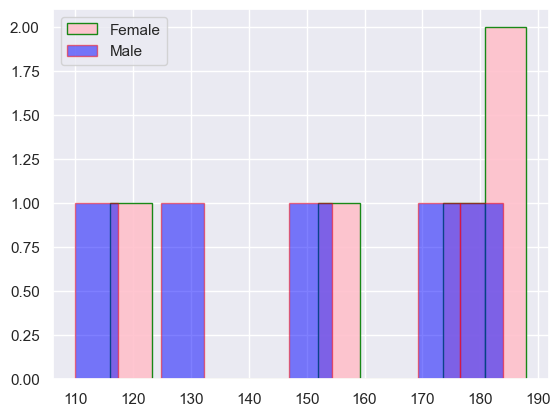

In [48]:
# Q26. Plot a graph to show the distribution of score in the final exam by gender

df_Demography=df_DEMO

df_score=df_GR

df = pd.merge(df_Demography,df_score, on = 'Student_id')

final_list=df['final'].tolist()
F_list = []
M_list = []
for i in df['Gender'].index:
    if df['Gender'][i]== 'F':
        F_list.append(df['final'][i])
    else:
        M_list.append(df['final'][i])

plt.hist(F_list, label='Female',alpha=.9, color='pink',edgecolor='green')
plt.hist(M_list, label='Male', alpha=.5, color='Blue', edgecolor='red')
plt.legend()
plt.show()

In [52]:
# Q27. Which demographic has the lowest average of scores in all 3 exams

df_Demography=df_DEMO

df_score=df_GR

df = pd.merge(df_Demography,df_score, on = 'Student_id')
d={}
for i in df['Student_id'].index:
    a=np.mean([df['Midterm 1'][i], df['Midterm 2'][i], df['final'][i]])
    d[i] = a
ind = min(d, key=d.get)
for i in list(df):
    print(df[i][ind])

print("Student_id" | "DOB" | "First Name" | "Last Name"| "Gender" | "Race" | "Age" | "Year" | "Midterm 1" | "Midterm 2"| "final")

S07
2010-08-01 00:00:00
Roger
Frederick
M
African
13
2010
64
33
110
97
48.5
55.0


TypeError: unsupported operand type(s) for |: 'str' and 'str'

In [53]:
# Q28. Delete the column age from question 6, using an iterative loop

import datetime as DT
df = df_DEMO

now = DT.datetime.now()
df["Age"] = ((now - df["DOB"]).dt.days)//365
print("Data before deleting Age column : \n\n",df)

for i in df:
    if i=='Age':
        df = df.drop(i, axis=1)
print("Data after deleting Age column : \n\n", df)

Data before deleting Age column : 

   Student_id        DOB First Name  Last Name Gender     Race  Age  Year
0        S01 2009-01-01    Barbara    Walters      F    White   14  2009
1        S02 2009-02-02       Nora      Jones      F    White   14  2009
2        S03 2009-07-12    Gabriel    Willows      F    Asian   14  2009
3        S04 2009-09-09       John        Doe      M    Asian   14  2009
4        S05 2009-05-06       Jane        Doe      F  African   14  2009
5        S06 2008-04-04        Pat     Murray      M  African   15  2008
6        S07 2010-08-01      Roger  Frederick      M  African   13  2010
7        S08 2009-03-03       John      Wills      M    White   14  2009
8        S09 2009-10-23       Paul    Cartney      M    White   14  2009
9        S10 2009-11-14     Janice      Smith      F  Spanish   14  2009
Data after deleting Age column : 

   Student_id        DOB First Name  Last Name Gender     Race  Year
0        S01 2009-01-01    Barbara    Walters      F    

<Axes: >

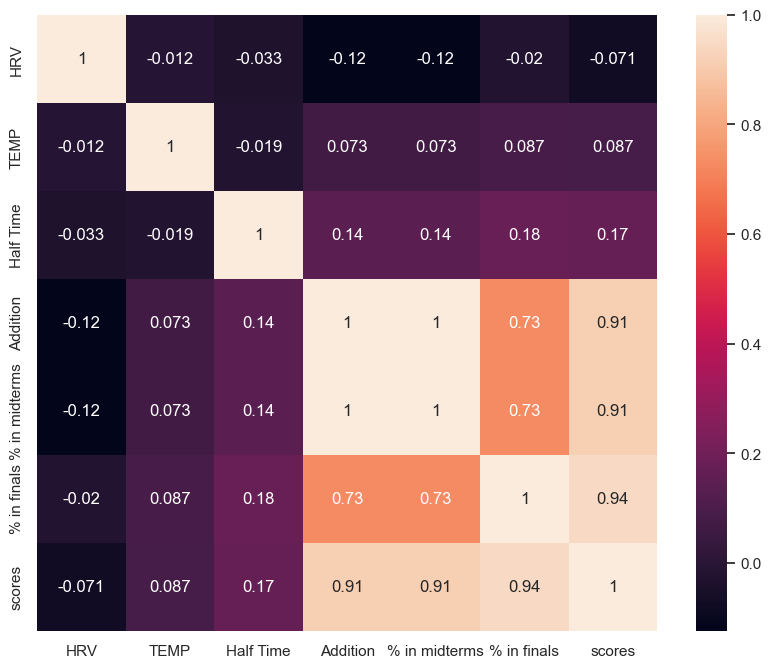

In [54]:
# Q29. Create a heat map of HRV, temp and scores. To show the correlation beween these variables

import math

df=df_IBI

def calculate_rmssd(IBI):
    sd=np.diff(IBI)
    sd_squared=sd**2
    mean_squared_diff=np.mean(sd_squared)
    rmssd=np.sqrt(mean_squared_diff)
    return rmssd

hrv_per_exam=df.groupby(['Student_id','Exam'])['IBI'].apply(calculate_rmssd).reset_index(name='HRV')
hrv_per_exam['HRV']*=600
hrv_per_exam['HRV']=hrv_per_exam['HRV'].astype(int)

df_temp = df_TEMP

df_score= df_GR

df_score['scores'] = df_score[['Midterm 1','Midterm 2','final']].mean(axis=1)

merged_df = pd.merge(df_temp, df_score, on='Student_id')
merged_df = pd.merge(hrv_per_exam, merged_df, on='Student_id')

merged_df = merged_df.drop(['Student_id','Time in mins','Midterm 1','Midterm 2', 'final','Exam_x','Exam_y'], axis =1)
merged_df =merged_df.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(merged_df, annot=True)

In [55]:
# Q30. Use the dataset given and Enumerate in Python with any example

df = df_DEMO
no_enum=[]
enum=[]
for i in df:
    no_enum.append(i)
print("with out Enumerate:\n",no_enum)
for i in enumerate(df):
    enum.append(i)
print("Enumerate:\n",enum)

with out Enumerate:
 ['Student_id', 'DOB', 'First Name', 'Last Name', 'Gender', 'Race', 'Age', 'Year']
Enumerate:
 [(0, 'Student_id'), (1, 'DOB'), (2, 'First Name'), (3, 'Last Name'), (4, 'Gender'), (5, 'Race'), (6, 'Age'), (7, 'Year')]


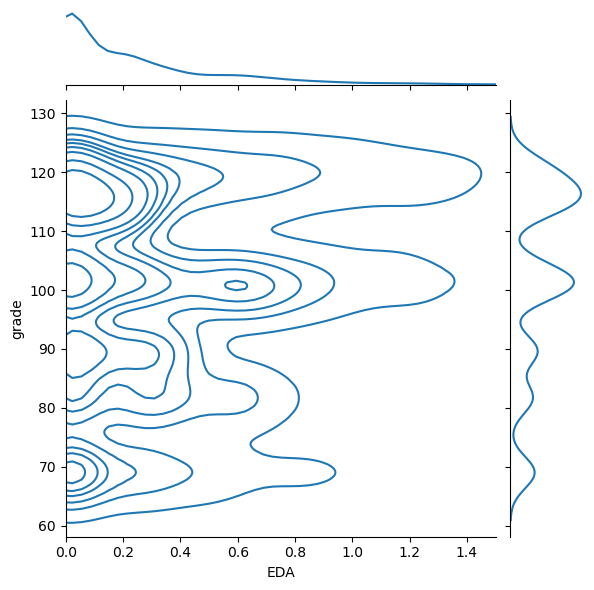

In [15]:
# Q31. Create a jointplot on EDA & Grades.

df_EDA = df_EDA
df_Grades = df_GR

df = pd.merge(df_EDA,df_Grades, on = 'Student_id')
df['grade'] = df.iloc[:, 4::].mean(axis=1)
sns.jointplot(data=df, x="EDA", y="grade", kind="kde", xlim=[0,1.5], ylim=None)

In [59]:
# Q32. Use indexing , loc to retrieve the row with maximum HR

df_HR 

max_HR = df_HR['HR'].idxmax()
row = df_HR.loc[max_HR]
print("Row with maximum HR\n\n",row)

TypeError: reduction operation 'argmax' not allowed for this dtype

In [23]:
#Q.33 Make a pivot table where Student IDs are the columns and EDA, HR and temp values are the rows

df_HR_EDA_merged = pd.merge(df_HR, df_EDA, on = ['Student_id', 'Exam', 'Time in mins'])
df = pd.merge(df_HR_EDA_merged, df_temp, on = ['Student_id', 'Exam', 'Time in mins'])

df_pivot=pd.pivot_table(df_exam, values = ['EDA', 'HR', 'TEMP'], columns = 'Student_id')

df_pivot

Student_id         S01        S010         S02         S03        S04  \
EDA           0.161171    0.149369    0.111534    0.272532   0.464468   
HR          106.522138  106.231091  114.313813  103.283502  98.399456   
TEMP         26.475624   26.187834   28.224066   26.899314  26.826271   

Student_id         S05         S06         S07         S08        S09  
EDA           0.370783    0.256905    0.208034    0.393437   0.299416  
HR          104.806015  104.793488  103.842102  105.475896  98.802752  
TEMP         28.553185   27.228459   25.569712   28.464253  28.453486

In [24]:
#Other method- using aggregate function- mean of all values

df_HR_EDA_merged = pd.merge(df_HR, df_EDA, on = ['Student_id', 'Exam', 'Time in mins'])
df = pd.merge(df_HR_EDA_merged, df_temp, on = ['Student_id', 'Exam', 'Time in mins'])

table1 = pd.pivot_table(df, columns=['Student_id'], values=['EDA','HR', 'TEMP'],
           aggfunc={'EDA':[np.mean],'HR':[np.mean], 'TEMP':[np.mean]},fill_value=0)
table1

Student_id         S01         S02         S03        S04         S05  \
EDA  mean     0.161171    0.111534    0.272532   0.464468    0.371345   
HR   mean   106.522138  114.313813  103.283502  98.399456  104.806015   
TEMP mean    26.475624   28.224066   26.899314  26.826271   28.559724   

Student_id         S06         S07         S08        S09         S10  
EDA  mean     0.256905    0.208034    0.394047   0.299416    0.149369  
HR   mean   104.793488  103.842102  105.475896  98.802752  106.231091  
TEMP mean    27.228459   25.569712   28.472022  28.453486   26.187834

In [63]:
# Q34. Display the Student Demographics and Grades who are born in leap Year


import calendar

df= pd.read_excel("Demo_Gr_Combined.xlsx")

Student_born_in_leap_year = df[df['DOB'].dt.year.apply(lambda x: calendar.isleap(x))]

Student_born_in_leap_year


Unnamed: 0 Student_id  Midterm 1  Midterm 2  final        DOB First Name  \
5           5        S06         71         64    175 2008-04-04        Pat   

  Last Name Gender     Race  
5    Murray      M  African

In [64]:
# Q35. Create a Bins of Grades to segregate the students in Grades  'A','B',C'

df = df_GR

# Average grade percentage
df['Addition'] = df['Midterm 1']+ df['Midterm 2'] + df['final']

df['Result Average Percentage'] = df['Addition']*100/400

#Define bins for Average grade % - for 0 to 55 grade 'C', 55 to 80 grade 'B',  greater than 80, grade 'A'

Bins = (0, 55, 80, 100)

#names for bin names

Grade_Names = ['C', 'B', 'A']


df['Grades'] = pd.cut(df['Result Average Percentage'], Bins, labels = Grade_Names)

df

Student_id  Midterm 1  Midterm 2  final  Addition  % in midterms  \
0        S01         78         82    182       342           80.0   
1        S02         82         85    180       347           83.5   
2        S03         77         90    188       355           83.5   
3        S04         75         77    149       301           76.0   
4        S05         67         77    157       301           72.0   
5        S06         71         64    175       310           67.5   
6        S07         64         33    110       207           48.5   
7        S08         92         88    184       364           90.0   
8        S09         80         39    126       245           59.5   
9        S10         89         64    116       269           76.5   

   % in finals      scores  Result Average Percentage Grades  
0         91.0  114.000000                      85.50      A  
1         90.0  115.666667                      86.75      A  
2         94.0  118.333333                      88.75      A  
3         74.5  100.333333                      75.25      B  
4         78.5  100.333333                      75.25      B  
5         87.5  103.333333                      77.50      B  
6         55.0   69.000000                      51.75      C  
7         92.0  121.333333                      91.00      A  
8         63.0   81.666667                      61.25      B  
9         58.0   89.666667                      67.25      B

In [65]:
# Q36. Create a Word Cloud with First name of Student Names based on thier Race 

!pip install wordcloud

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

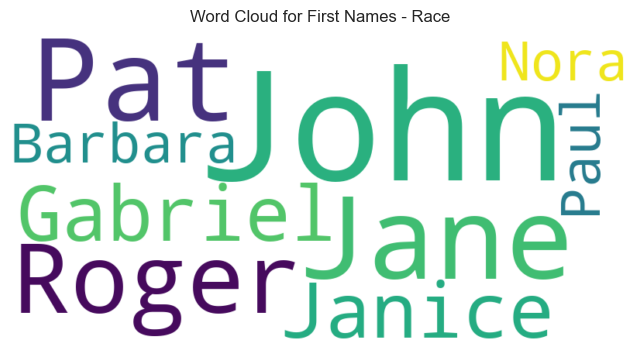

In [66]:
# Q36. Create a Word Cloud with First name of Student Names based on thier Race 

df_demo = df_DEMO

all_races = ' '.join(df_demo.groupby('Race')['First Name'].apply(' '.join))
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white',).generate(all_races)
plt.figure(figsize=(8,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for First Names - Race' )
plt.axis('off')
plt.show()

In [25]:
# Q37. Display the student Names and respective grades who has Maximum heart rate

df_DE_GR_merged = pd.merge(df_DEMO,df_GR, on = ['Student_id'])
df_exam = pd.merge(df_DE_GR_merged, df_HR, on = ['Student_id'])

Max_Heart_Rate = (df_exam.groupby(['Student_id', 'First Name', 'Last Name', 'Midterm 1', 'Midterm 2', 'final'])['HR']).max()

print(Max_Heart_Rate, "Max_Heart_Rate")


Student_id  First Name  Last Name  Midterm 1  Midterm 2  final
S01         Barbara     Walters    78         82         182      190.713
S02         Nora        Jones      82         85         180      196.847
S03         Gabriel     Willows    77         90         188      194.839
S04         John        Doe        75         77         149      199.278
S05         Jane        Doe        67         77         157      198.272
S06         Pat         Murray     71         64         175      199.156
S07         Roger       Frederick  64         33         110      186.544
S08         John        Wills      92         88         184      192.261
S09         Paul        Cartney    80         39         126      197.741
S10         Janice      Smith      89         64         116      182.027
Name: HR, dtype: float64 Max_Heart_Rate


In [68]:
# Q38. Write a Python program to get the number of occurrences of a specified element in the array.


n = int(input("Enter your number ="))

from array import *
arr = array('i', [1, 6, 4, 4, 1, 0, 4, 6, 1, 4, 3, 44, 4])

print("Original array: "+ str(arr))
print("Number of occurences of the number", n ,"in said array: "+str(arr.count(n)))

Enter your number =4
Original array: array('i', [1, 6, 4, 4, 1, 0, 4, 6, 1, 4, 3, 44, 4])
Number of occurences of the number 4 in said array: 5


In [69]:
# Q39. Create a 3D list using nested for loops.

x = int(input("Enter your dim (x) to create 3Dlist ="))
y = int(input("Enter your dim (y) to create 3Dlist ="))
z = int(input("Enter your dim (z) to create 3Dlist="))

a = input("Enter your number/list to create 3Dlist =")


def create_list(x, y, z):
    Arr = []
    for i in range(x):
        Arr_2d = []
        for j in range(y):
            Arr_1d = []
            for k in range(z):
                Arr_1d.append(a)
            Arr_2d.append(Arr_1d)
        Arr.append(Arr_2d)
    return Arr
 
ThreeD_arr = create_list(x, y, z)

ThreeD_arr

Enter your dim (x) to create 3Dlist =3
Enter your dim (y) to create 3Dlist =2
Enter your dim (z) to create 3Dlist=1
Enter your number/list to create 3Dlist =[5,[7,9],32]


[[['[5,[7,9],32]'], ['[5,[7,9],32]']],
 [['[5,[7,9],32]'], ['[5,[7,9],32]']],
 [['[5,[7,9],32]'], ['[5,[7,9],32]']]]

In [70]:
# Q40. #Display each row of this array as a separate slice

Array = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

print(Array[0])
print(Array[1])
print(Array[2])

[1, 2, 3]
[4, 5, 6]
[7, 8, 9]


In [31]:
# Q41. Find the Student name and the Exam who has the Temprature '36.042'

df_Demo_Temp_Combined = pd.merge(df_DEMO,df_TEMP, on = ['Student_id'])

df_Demo_Temp_Combined.query("TEMP == 36.042 & Exam == 'final'")

df1 = df_Demo_Temp_Combined.query("TEMP == 36.042 & Exam == 'final'")
df1

Student_id        DOB First Name Last Name Gender   Race    TEMP  \
921        S02 2009-02-02       Nora     Jones      F  White  36.042   

     Time in mins   Exam  
921           162  final

In [72]:
# Q42. Using arrays and loops, find the count of students based on gender.

from array import*

df3 = df_DEMO

data = df3[['Student_id', 'First Name', 'Last Name','Gender']].to_numpy()

Unique_gender = df3['Gender'].unique()

Genderwise_count = {}
for gender in Unique_gender:
    count = df3[df3['Gender']==gender]
    Genderwise_count[gender] = count

for gender,count in Genderwise_count.items():
    print(f'Gender : {gender}  Count : {count}')
    
count_of_students = df3[["Gender"]].value_counts()
count_of_students

Gender : F  Count :   Student_id        DOB First Name Last Name Gender     Race  Age  Year
0        S01 2009-01-01    Barbara   Walters      F    White   14  2009
1        S02 2009-02-02       Nora     Jones      F    White   14  2009
2        S03 2009-07-12    Gabriel   Willows      F    Asian   14  2009
4        S05 2009-05-06       Jane       Doe      F  African   14  2009
9        S10 2009-11-14     Janice     Smith      F  Spanish   14  2009
Gender : M  Count :   Student_id        DOB First Name  Last Name Gender     Race  Age  Year
3        S04 2009-09-09       John        Doe      M    Asian   14  2009
5        S06 2008-04-04        Pat     Murray      M  African   15  2008
6        S07 2010-08-01      Roger  Frederick      M  African   13  2010
7        S08 2009-03-03       John      Wills      M    White   14  2009
8        S09 2009-10-23       Paul    Cartney      M    White   14  2009


Gender
F         5
M         5
Name: count, dtype: int64

In [73]:
# Q43. Generate Unique Student ID  using Lamda Function.

df = df_DEMO

import uuid

id_generator = lambda x: (str(uuid.uuid4())[0:6])

Student_details = df_exam.groupby(['First Name', 'Last Name', 'DOB'])

df["New_Unique_ids"] = list(map(id_generator, Student_details))

print("Student Name | New_student_ids")

for i, row in df.iterrows():
    print(f"{row['First Name']} {row['Last Name']} | {row['New_Unique_ids']}")


Student Name | New_student_ids
Barbara Walters | 4e940d
Nora Jones | e90769
Gabriel Willows | 42aa30
John Doe | cefad2
Jane Doe | 58278c
Pat Murray | fcbfdf
Roger Frederick | f08f14
John Wills | de337f
Paul Cartney | fd32cd
Janice Smith | 3fdc40


In [27]:
# Q44. Create a Box  plot for HR and Temp

import seaborn as sns
import plotly.express as px

df1= df_TEMP

df2= df_HR

df3= pd.merge(df1,df2,on=['Time in mins','Student_id','Exam'],how='outer')
df= df3[['HR', 'TEMP']]

fig = px.box(df.melt(), y="value", facet_col="variable", boxmode="overlay", color="variable")
fig.update_yaxes(matches=None)

for i in range(len(fig["data"])):
    yaxis_name = 'yaxis' if i == 0 else f'yaxis{i+1}'
    fig.layout[yaxis_name].showticklabels = True

fig.update_layout(legend = dict(bgcolor = 'white'))

fig.update_layout(plot_bgcolor = 'white')

fig.update_layout(height=600, width=800, title_text="HR and TEMP Boxplot")

fig.update_xaxes(showline=True, linewidth=2, linecolor='black')
fig.update_yaxes(showline=True, linewidth=2, linecolor='black')

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='gray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='gray')


fig.show()

In [75]:
# Q45. Find the student's Max mean EDA who are attending Final 

df = df_EDA

table = pd.pivot_table(df[df['Exam']=='final'],  index=['Student_id'], columns=['Exam'], values=['EDA'],
           aggfunc={'EDA':[np.mean]},fill_value=0)


print("Max mean EDA of Student attending final= ",table.max())
print("Individual Student's Max mean EDA as per table:",table)

Max mean EDA of Student attending final=             Exam 
EDA  mean  final    0.542409
dtype: float64
Individual Student's Max mean EDA as per table:                  EDA
                mean
Exam           final
Student_id          
S01         0.103118
S02         0.078360
S03         0.169737
S04         0.526800
S05         0.542409
S06         0.129932
S07         0.212474
S08         0.534721
S09         0.402572
S10         0.111297


In [32]:
# Q46. Find the Grade of a Student whose Name ends with 'S'

df_Gr_Demo_combined = pd.merge(df_DEMO,df_GR, on = ['Student_id'])

df_s= df_Gr_Demo_combined[df_Gr_Demo_combined['Last Name'].astype(str).str.endswith('s', na=False)]

df_s

Student_id        DOB First Name Last Name Gender   Race  Midterm 1  \
0        S01 2009-01-01    Barbara   Walters      F  White         78   
1        S02 2009-02-02       Nora     Jones      F  White         82   
2        S03 2009-07-12    Gabriel   Willows      F  Asian         77   
7        S08 2009-03-03       John     Wills      M  White         92   

   Midterm 2  final  
0         82    182  
1         85    180  
2         90    188  
7         88    184

C:\Users\Tech World INC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1500x800 with 0 Axes>

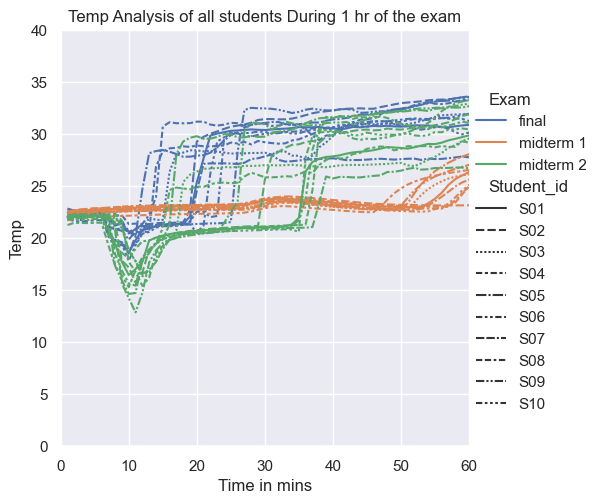

In [77]:
# Q47. Plot Temp analysis of all students during 1 hr of the exam (x axis time and y axis Temp)

# Method 1= For all Students graph



import seaborn as sns

Temp_per_minute = df_TEMP.sort_values("Student_id")

sns.set_theme(style="darkgrid")

#sns.color_palette("icefire", as_cmap=True)


plt.figure(figsize=(15,8))


sns.relplot(
    data= Temp_per_minute , x="Time in mins", y="TEMP",kind="line", hue="Exam", style="Student_id")

plt.xlim([0, 60])
plt.ylim([0, 40])

plt.xlabel('Time in mins')
plt.ylabel('Temp')

plt.title('Temp Analysis of all students During 1 hr of the exam')

plt.show()

C:\Users\Tech World INC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1500x800 with 0 Axes>

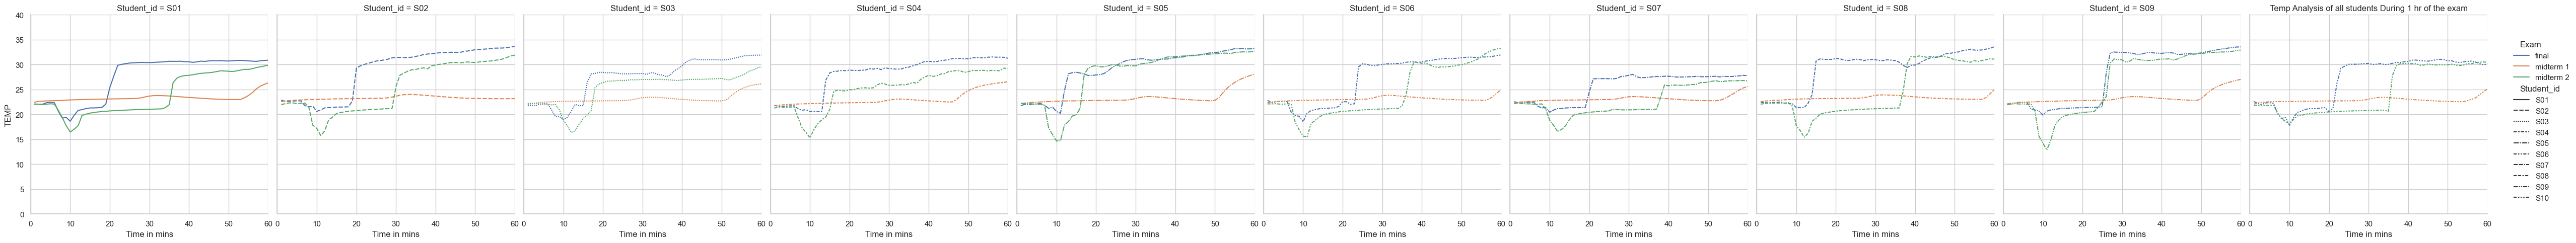

In [78]:
#Method 2: for all students

import seaborn as sns

Temp_per_minute = df_TEMP.sort_values("Student_id")

sns.set_theme(style="whitegrid")

#sns.color_palette("icefire", as_cmap=True)


plt.figure(figsize=(15,8))


sns.relplot(
    data= Temp_per_minute , x="Time in mins", y="TEMP",kind="line", col='Student_id', hue="Exam", style="Student_id")

plt.xlim([0, 60])
plt.ylim([0, 40])

plt.xlabel('Time in mins')
plt.ylabel('Temp')

plt.title('Temp Analysis of all students During 1 hr of the exam')

plt.show()

In [33]:
# Q48. Find the Full Name of the student who has Max HR

df_Gr_Demo_combined = pd.merge(df_DEMO,df_GR, on = ['Student_id'])
df1= pd.merge(df_Gr_Demo_combined,df_HR, on = ['Student_id'])

T1 = df1[df1['HR']==df1['HR'].max()]
T1


Student_id        DOB First Name Last Name Gender   Race  Midterm 1  \
2720        S04 2009-09-09       John       Doe      M  Asian         75   

      Midterm 2  final       HR  Time in mins       Exam  
2720         77    149  199.278          41.0  midterm 1

In [80]:
# Q49. [    "Python Hackthaon.",
#    "December 2023.",
#   "Numpy Ninja."  ]
#tokenise the Sentences  and place it in single column

sentences = [
    "Python Hackthaon.",
    "December 2023.",
    "Numpy Ninja."
]
String = []
for i in sentences:
    String.extend(i.split())
df = pd.DataFrame(data={'Column':String})
print(df)

       Column
0      Python
1  Hackthaon.
2    December
3       2023.
4       Numpy
5      Ninja.


In [81]:
# Q50. Count the Students who are in the Race Group 'White'

df=df_DEMO

white = df[df['Race'] == 'White']
x = white['Race'].count()
print("Number of Students who are in Race Group:", x)

Number of Students who are in Race Group: 4


In [82]:
# Q51. Display the Youngest Student demographic details. with Avg Heart Rate.

df1=df_DEMO
df2=df_HR

df1["Age"] = (pd.to_datetime("today") - df1["DOB"]).dt.days // 365
youngest_studentid = df1["Age"].idxmin()
youngest_student_info= df1.loc[youngest_studentid]
filtered_hr_data = df2[df2["Student_id"] == youngest_student_info["Student_id"]]
specific_student_hr_mean = filtered_hr_data["HR"].mean()
print("Youngest Student Information with Average heart rate")
print(f"Student_id        : {youngest_student_info['Student_id']}")
print(f"Name              : {youngest_student_info['First Name']} {youngest_student_info['Last Name']}")
print(f"Gender            : {youngest_student_info['Gender']}")
print(f"Race              : {youngest_student_info['Race']}")
print(f"Average Heart Rate: {specific_student_hr_mean:.2f}")

Youngest Student Information with Average heart rate
Student_id        : S07
Name              : Roger Frederick
Gender            : M
Race              : African
Average Heart Rate: 103.84


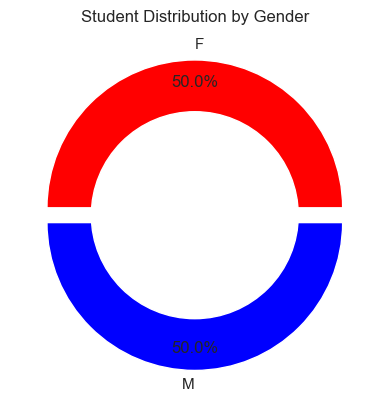

In [83]:
# Q52. Plot the Donut chart Student distrubution by Gender.

df=df_DEMO

gender_counts = df['Gender'].value_counts()

# Set pie chart slices and labels
pie_slices = gender_counts.values
pie_labels = gender_counts.index
colors = ['#FF0000', '#0000FF']
explode = (0.05,0.05)

# Create pie chart
plt.pie(pie_slices, labels=pie_labels,colors=colors, autopct='%1.1f%%', pctdistance=0.85, explode= explode)

# Add title
plt.title('Student Distribution by Gender')

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Add Legends
#plt.legend(labels, loc="upper right")
 
# Display chart
plt.show()

In [84]:
# Q53. Calculate the 'AGE' of the Student and Display with Student Name 

from datetime import date

df=df_DEMO

df["Age"] = (pd.to_datetime('today') - df["DOB"]).dt.days // 365

print("Student Name | Age")

for i, row in df.iterrows():
    print(f"{row['First Name']} {row['Last Name']} | {row['Age']}")

Student Name | Age
Barbara Walters | 14
Nora Jones | 14
Gabriel Willows | 14
John Doe | 14
Jane Doe | 14
Pat Murray | 15
Roger Frederick | 13
John Wills | 14
Paul Cartney | 14
Janice Smith | 14


In [85]:
# Q54. np.arange(1,31).reshape(6,5),find array slicing to get the elements 4,5,24,25,29,30.

arr=np.arange(1,31).reshape(6,5)
print(arr)
result_arr=np.concatenate((arr[0:1:,3:], arr[-2:6:,3:]),axis=0)
print('Array slicing: \n', result_arr)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]]
Array slicing: 
 [[ 4  5]
 [24 25]
 [29 30]]


In [86]:
# Q55. Display the mean Heart Rate who scored Least Grade in Final

df1=df_GR

df2=df_HR

least_score = df1["final"].idxmin()
least_grade_details= df1.loc[least_score]
filtered_hr_data = df2[df2["Student_id"] == youngest_student_info["Student_id"]]
specific_student_hr_mean = filtered_hr_data["HR"].mean()
print(f"Mean Heart Rate who Scored Least Grade in Final: {specific_student_hr_mean:.2f}")   

Mean Heart Rate who Scored Least Grade in Final: 103.84


In [88]:
# Q56. Input the Lastname of the Student and Based on the gender concatinate 'MR' or 'MS' to the Full Name

df=df_DEMO

InputLastname =input('Enter the last name:').lower()
df["Full Name"]=df.apply(lambda row: 'MR' if row['Gender'] == 'M' else 'MS', axis=1)+'.'+ df['First Name'] + ' ' + df['Last Name']
df["Last Name"] = df["Last Name"].str.lower()
Printname = df[df["Last Name"] == InputLastname]
#print(Printname["Full Name"].values[0])
if len(Printname) > 0:
    for name in Printname["Full Name"]:
        print(name)
else:
    print(f"The given last name is not available: {InputLastname}")

Enter the last name:walters
MS.Barbara walters


C:\Users\Tech World INC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



Text(3.9444444444444446, 0.5, 'Count of the Students')

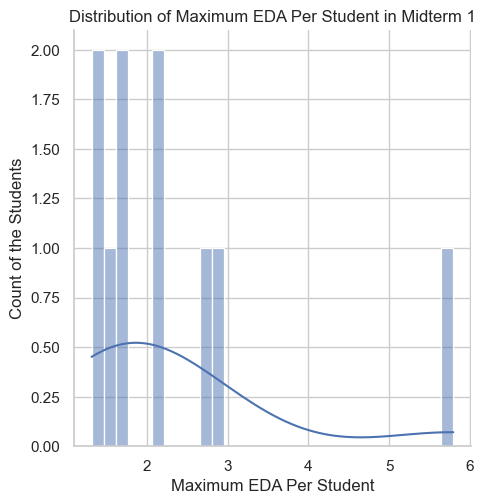

In [89]:
# Q57. Give Distrubution chart of MAX EDA of the midterm1.

df=df_EDA

midterm1 = df[df['Exam'] == 'midterm 1']
max_eda_per_student = (df.groupby('Student_id')['EDA']).max()
sns.displot(max_eda_per_student, kde=True,bins=30)
plt.title("Distribution of Maximum EDA Per Student in Midterm 1")
plt.xlabel("Maximum EDA Per Student")
plt.ylabel("Count of the Students")

Text(0.5, 1.0, 'Students count based on Genderwise')

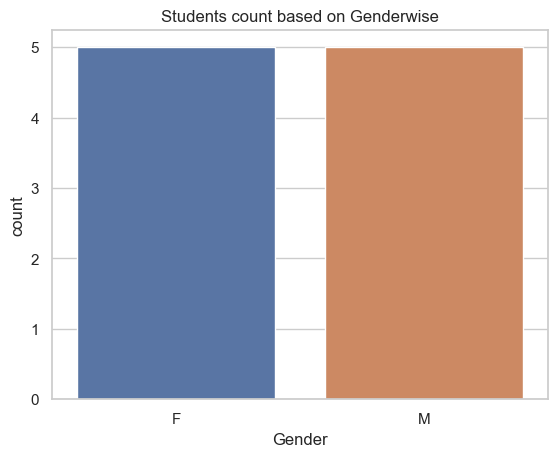

In [90]:
# Q58. Count the students based on Genderwise using count plot.

df=df_DEMO
sns.countplot(data=df,x='Gender')
plt.title("Students count based on Genderwise")

In [91]:
# Q59. Display full name of Student who are born in year '2010'

df=df_DEMO
ListofStudentsin2010 = []
for index, row in df.iterrows():
    if pd.to_datetime(row["DOB"]).year == 2010:
        full_name = f"{row['First Name']} {row['Last Name']}"
        ListofStudentsin2010.append(full_name)
print("Full Name of Student Who are born in year 2010:", ListofStudentsin2010)

Full Name of Student Who are born in year 2010: ['Roger frederick']


In [92]:
# Q60.   [ 1,  2,  3,  4,  5],
#      [ 6,  7,  8,  9, 10],
#      [11, 12, 13, 14, 15],
#      [16, 17, 18, 19, 20],
#      [21, 22, 23, 24, 25],
#      [26, 27, 28, 29, 30]  In the Array,find array slicing for elements 2,8,14,20.

arr=np.arange(1,31).reshape(6,5)
result = arr[[0,1, 2, 3], [1, 2, 3, 4]]
print('Array slicing: \n')
for i in result.flat:
    print(i)

Array slicing: 

2
8
14
20


In [93]:
# Q61. Create a dataframe with Max EDA and Mean HR as the indices and the count of number of records per student as the value.

eda = df_EDA
hr = df_HR

merged_df = pd.merge(eda, hr, on='Student_id')
summary_df = merged_df.groupby('Student_id').agg({'EDA': 'max', 'HR': 'mean'}).reset_index()
print(summary_df)

# Group by 'Max EDA' and 'Mean HR', count records per student
result = summary_df.groupby(['EDA', 'HR']).size().reset_index(name='Count')

# Set 'Max EDA' and 'Mean HR' as indices
result.set_index(['EDA', 'HR'], inplace=True)
print(result)

  Student_id    EDA          HR
0        S01  2.198  106.522138
1        S02  1.311  114.313813
2        S03  1.651  103.283502
3        S04  5.795   98.399456
4        S05  1.611  104.806015
5        S06  2.184  104.793488
6        S07  1.485  103.842102
7        S08  2.920  105.475896
8        S09  2.756   98.802752
9        S10  1.423  106.231091
                  Count
EDA   HR               
1.311 114.313813      1
1.423 106.231091      1
1.485 103.842102      1
1.611 104.806015      1
1.651 103.283502      1
2.184 104.793488      1
2.198 106.522138      1
2.756 98.802752       1
2.920 105.475896      1
5.795 98.399456       1


In [94]:
# Q62. Print the Last name like below ouptput eg:.Last Name and count of Last Name   Occurance  :
#Counter({'Doe': 2, 'Walters': 1, 'Jones': 1, 'Willows': 1, 'Murray': 1, 'Frederick': 1, 'Wills': 1, 'Cartney': 1, 'Smith': 1})

df = df_DEMO
Counter = df['Last Name'].value_counts()
print(Counter)

Last Name
doe          2
walters      1
jones        1
willows      1
murray       1
frederick    1
wills        1
cartney      1
smith        1
Name: count, dtype: int64


In [95]:
# Q63. Retrieve the row with minimum EDA using sorting technique.

df = df_EDA
sorted_df = df.sort_values(by='EDA')
min_eda_row = sorted_df.iloc[0]
print(min_eda_row)

EDA                    0.0
Time in mins           166
Student_id             S06
Exam             midterm 2
Time Category    Thirdpart
Name: 4499, dtype: object


In [96]:
# Q64. get the last letter of last name of students using RegEX

import re
def get_last_letter_of_last_name(name):
    pattern = re.compile(r"\S$")
    match = re.search(pattern, name)
    if match:
          return match.group(0)
    else:
          return None
df=df_DEMO

df1=df["Last Name"]
last_letters = []
for Lastname in df["Last Name"]:
    last_letter = get_last_letter_of_last_name(Lastname)
    if last_letter:
        last_letters.append(last_letter)
print(f"Last letters of last names: {last_letters}")

Last letters of last names: ['s', 's', 's', 'e', 'e', 'y', 'k', 's', 'y', 'h']


In [97]:
# Q65. Generate a 3x3  Array using Random values between 1to 9  and Fix the values and position  in Next Run.

import numpy as np
import random

def generate_random_array():
    arr = np.random.randint(1, 10, size=(3, 3))
    return arr
# Fix the values and position of the array
def fix_array(arr):
    arr.setflags(write=False)
    return arr
random_array = generate_random_array()
fixed_array = fix_array(random_array.copy())
print("Initial Random Array:")
print(random_array)
print("Fixed Array:")
print(fixed_array)

Initial Random Array:
[[1 4 5]
 [7 9 1]
 [9 7 5]]
Fixed Array:
[[1 4 5]
 [7 9 1]
 [9 7 5]]


In [98]:
# Q66. find the way to reverse string for given input 

str1 = str(input("Enter a Sentence"))
s = str1.split()[::-1]
r= []
for i in s:
    r.append(i)
print(" ".join(r))

Enter a SentenceI love to learn Python
Python learn to love I


In [99]:
# Q67. from'Python Hackthon Dec 2023' give 'Python Hack' using RegEX

import re
str = "Python Hackthon Dec 2023"
match = re.search(r"Python\s+Hack", str, flags=re.IGNORECASE)
if match:
    print(match.group(0))
else:
    print("Pattern not found")

Python Hack


In [103]:
# Q68. Using HR values print even if it even number and odd if it odd number

df4 = pd.read_excel("Exam Stress Final.xlsx", "HR")
df4['HR'] = df4['HR'].round()
df4['Even/Odd'] = (df4['HR'] % 2).apply(lambda i: 'Even' if i == 0 else 'Odd')
df4

HR  Time in mins Student_id       Exam Even/Odd
0     119.0           1.0        S01      final      Odd
1     131.0           2.0        S01      final      Odd
2     132.0           3.0        S01      final     Even
3     110.0           4.0        S01      final     Even
4      81.0           5.0        S01      final      Odd
...     ...           ...        ...        ...      ...
7369  171.0         214.0       S010  Midterm 2      Odd
7370  122.0         215.0       S010  Midterm 2     Even
7371  109.0         216.0       S010  Midterm 2      Odd
7372    NaN           NaN        NaN  Midterm 2      Odd
7373    NaN           NaN        NaN  Midterm 2      Odd

[7374 rows x 5 columns]

In [104]:
# Q69. Input any string from user, Convert that into a tuple and then find the lenghth of that tuple

str2 = input("Enter a sentence ")
t = tuple(str2)
#print(t)
length = len (t)
print(length)

Enter a sentence I love to learn Python
22


In [105]:
# Q70. find the students who has 'o' in their names and print them

import re

df1 = df_DEMO
df2 = df1[["First Name", "Last Name"]]
pattern = r"\wo\w+"
matches_first_name = df2["First Name"].str.match(pattern)
matches_last_name = df2["Last Name"].str.match(pattern)
combined_matches = matches_first_name | matches_last_name
filtered_names = df2[combined_matches]
print(filtered_names)

  First Name  Last Name
1       Nora      jones
3       John        doe
4       Jane        doe
6      Roger  frederick
7       John      wills


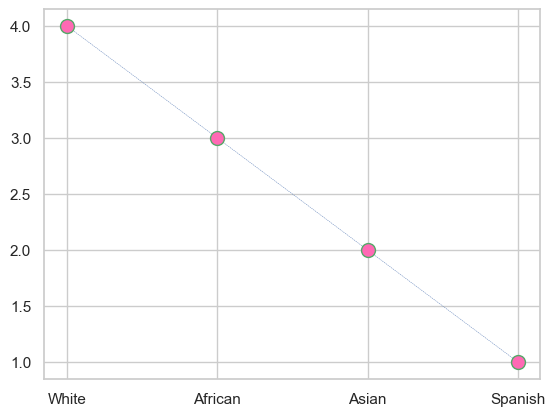

In [106]:
# Q71. Creat the visualisation to count the student based on race

df1 = df_DEMO
df1[["Student_id","Race"]]
count_of_students = df1['Race'].value_counts()
#print(count_of_students)
plt.plot(count_of_students, ls = '--', color = 'b', linewidth = '0.3', marker = 'o', ms = 10, mec = 'g', mfc = 'hotpink')
plt.show()

In [107]:
# Q72. select 25 different random values between 366 to 500. code should generates same value if we run again.

import random
random.seed(0)
random_values = []
for i in range(25):
    random_values.append(random.randint(366, 500))
print(random_values)



[464, 473, 376, 432, 496, 490, 469, 443, 488, 457, 421, 495, 401, 438, 401, 390, 430, 403, 445, 391, 384, 450, 486, 391, 456]


In [108]:
# Q73. Find the max EDA of the higest scoring student (whose average of midterm1,midterm2 and Final is maximum)

df1 = df_GR
df2 = df_EDA
df1["average_score"] = (df1["Midterm 1"] + df1["Midterm 2"] + df1["final"]) / 3
# Find highest scoring student
highest_score_student = df1["Student_id"].iloc[df1["average_score"].idxmax()]
# Find max EDA of the highest scoring student
max_eda = df2[df2["Student_id"] == highest_score_student]["EDA"].max()
print(f"Max EDA of the highest scoring student: {max_eda}")

Max EDA of the highest scoring student: 2.92


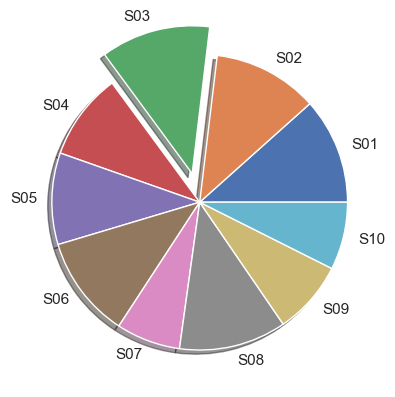

In [109]:
# Q74. Create a Pie chart for  Grades and explode the wedge with Highest Grade in Final and Label with the Student ID

Grades_df = df_GR
Grades_df
Final_Grades = Grades_df["final"]
Final_Grades
Student = Grades_df["Student_id"]
#print(Student)
my_labels = Student
my_explode = [0,0,0.2,0,0,0,0,0,0,0]
plt.pie(Final_Grades, labels=my_labels, explode = my_explode, shadow = 'True')
#plt.legend(title = "Analysis of Students with Grades in Final Exam")
plt.show()

In [110]:
# Q75. Find min temparature of the student whose average score (midterm1,midterm2, final) is minimum

df1 = df_GR
df3 = df_TEMP
df1["average_score"] = (df1["Midterm 1"] + df1["Midterm 2"] + df1["final"]) / 3
# Find student whose average score is minimum
student_min_average_score = df1["Student_id"].iloc[df1["average_score"].idxmin()]
# Find min temperature of the student whose average score is minimum
min_temp = df3[df3["Student_id"] == student_min_average_score]["TEMP"].min()
print(f"Min Temperature of the student with minimum average score is: {min_temp}")

Min Temperature of the student with minimum average score is: 16.552


C:\Users\Tech World INC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 3000x2000 with 0 Axes>

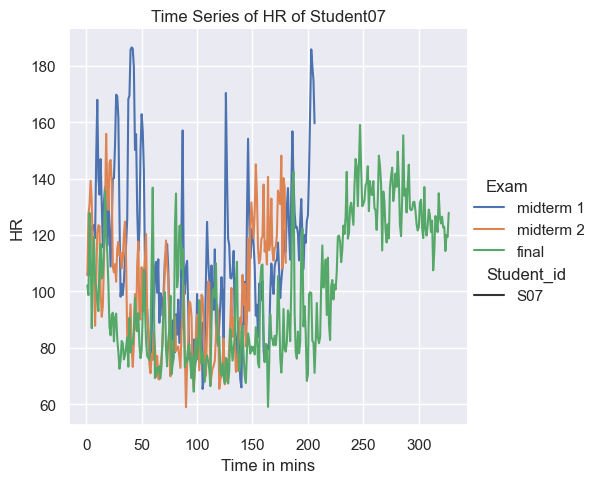

In [111]:
# Q76. Plot the time series of HR( every 5 mins) of student07

import seaborn as sns

HR = df_HR.sort_values("Student_id")
HR=HR[HR['Student_id']=='S07']
sns.set_theme(style="darkgrid")
plt.figure(figsize=(30,20))
sns.relplot(
    data=HR, x="Time in mins", y="HR",kind="line", hue="Exam", col='Student_id', style="Student_id")
plt.xlabel('Time in mins')
plt.ylabel('HR')
#plt.margins(x= 5, y=1)
plt.title('Time Series of HR of Student07')
plt.show()

<Axes: xlabel='IBI', ylabel='Density'>

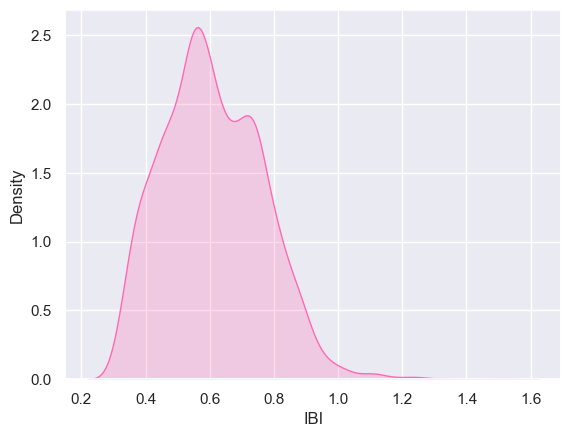

In [112]:
# Q77. Plot the Density Chart for IBI 

df = df_IBI
sns.kdeplot(df["IBI"], fill = True, color = 'HotPink')



In [114]:
# Q78. Convert gender into numeric by one-hot encoding 

from sklearn.preprocessing import OneHotEncoder 

df1 = pd.read_excel("Exam Stress Final.xlsx","Demography")
df1['Gender'] = df1['Gender'].astype('category') 
df1['Gen_new'] = df1['Gender'].cat.codes 
enc = OneHotEncoder() 
encoded_data = enc.fit_transform(df1[['Gender']]).toarray()
onehot = enc.get_feature_names_out(['Gender'])
df1[onehot] = encoded_data
df1

Student_id        DOB First Name  Last Name Gender     Race  Gen_new  \
0        S01 2009-01-01    Barbara    Walters      F    White        0   
1        S02 2009-02-02       Nora      Jones      F    White        0   
2        S03 2009-07-12    Gabriel    Willows      F    Asian        0   
3        S04 2009-09-09       John        Doe      M    Asian        1   
4        S05 2009-05-06       Jane        Doe      F  African        0   
5        S06 2008-04-04        Pat     Murray      M  African        1   
6        S07 2010-08-01      Roger  Frederick      M  African        1   
7        S08 2009-03-03       John      Wills      M    White        1   
8        S09 2009-10-23       Paul    Cartney      M    White        1   
9        S10 2009-11-14     Janice      Smith      F  Spanish        0   

   Gender_F  Gender_M  
0       1.0       0.0  
1       1.0       0.0  
2       1.0       0.0  
3       0.0       1.0  
4       1.0       0.0  
5       0.0       1.0  
6       0.0       1.0  
7       0.0       1.0  
8       0.0       1.0  
9       1.0       0.0

In [115]:
# Q79. Convert ' race' into numeric by Label encoding 

from sklearn.preprocessing import LabelEncoder

df1 = pd.read_excel("Exam Stress Final.xlsx", "Demography")
#df1
Label_encoding = LabelEncoder()
df1['Encdoed_race'] = Label_encoding.fit_transform(df1['Race'])
df1


Student_id        DOB First Name  Last Name Gender     Race  Encdoed_race
0        S01 2009-01-01    Barbara    Walters      F    White             3
1        S02 2009-02-02       Nora      Jones      F    White             3
2        S03 2009-07-12    Gabriel    Willows      F    Asian             1
3        S04 2009-09-09       John        Doe      M    Asian             1
4        S05 2009-05-06       Jane        Doe      F  African             0
5        S06 2008-04-04        Pat     Murray      M  African             0
6        S07 2010-08-01      Roger  Frederick      M  African             0
7        S08 2009-03-03       John      Wills      M    White             3
8        S09 2009-10-23       Paul    Cartney      M    White             3
9        S10 2009-11-14     Janice      Smith      F  Spanish             2

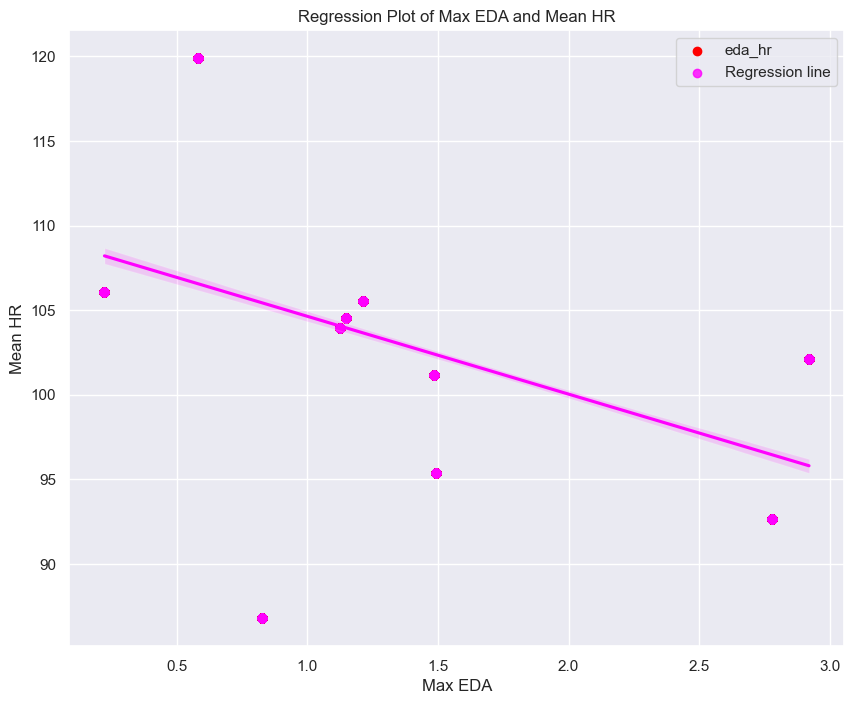

In [119]:
# Q80. Create a Regression Plot on Max EDA and mean HR 

df1 = pd.read_excel("Exam Stress Final.xlsx", "EDA")
df2 = pd.read_excel("Exam Stress Final.xlsx", "HR")

merged_df = pd.merge(df1, df2, on=["Student_id", "Time in mins", "Exam"])
merged_df["max_eda"] = merged_df.groupby("Student_id")["EDA"].transform("max")
merged_df["mean_hr"] = merged_df.groupby("Student_id")["HR"].transform("mean")
x = merged_df["max_eda"]
y = merged_df["mean_hr"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
plt.figure(figsize=(10, 8))
plt.scatter(x, y, color="red", label="eda_hr")
sns.regplot(x="max_eda", y="mean_hr", data=merged_df, color="magenta", label="Regression line")
plt.xlabel("Max EDA")
plt.ylabel("Mean HR")
plt.title("Regression Plot of Max EDA and Mean HR")
plt.legend()
plt.show()